# Dimensionality Reduction

## The Problem

There is an interesting tradeoff between model performance and a feature's dimensionality ([Link](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)):
![http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/](https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/images/dimensionality_vs_performance.png)

>*If the amount of available training data is fixed, then overfitting occurs if we keep adding dimensions. On the other hand, if we keep adding dimensions, the amount of **training data needs to grow exponentially fast to maintain the same coverage** and to avoid overfitting* ([Computer Vision for Dummies](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)).

![http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/](https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/images/curseofdimensionality.png)

### Multi-Collinearity

In many cases, there is a high degree of correlation between many of the features in a dataset. For instance, suppose that you use `TfIdfVectorizer(ngrams=(3,3))`. This means to tokenize the text into tri-grams. Then, you'll have extremely high correlation between tokens such as `bought this for`, `this for my`, `for my husband`. 


## Sparsity

- High dimensionality increases the sparsity of your features (**what NLP techniques have we used that illustrate this point?**)
- The density of the training samples decreases when dimensionality increases:
- Distance measures (Euclidean, for instance) start losing their effectiveness, because there isn't much difference between the max and min distances in higher dimensions.
- Many models that rely upon assumptions of Gaussian distributions (like OLS linear regression), Gaussian mixture models, Gaussian processes, etc. become less and less effective since their distributions become flatter and "fatter tailed".
![http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/](../images/distance-asymptote.png)

What is the amount of data needed to maintain **20% coverage** of the feature space? For 1 dimension, it is **20% of the entire population's dataset**. For a dimensionality of $D$:

$$
X^{D} = .20
$$
$$
(X^{D})^{\frac{1}{D}} = .20^{\frac{1}{D}}
$$
$$
X = \sqrt[D]{.20}
$$
You can approximate this as 
```python
def coverage_requirement(requirement, D):
    return requirement ** (1 / D)

x = []
y = []
for d in range(1,20):
    y.append(coverage_requirement(0.10, d))
    x.append(d)
    
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel("Number of Dimensions")
plt.ylabel("Appromximate % of Population Dataset")
plt.title("% of Dataset Needed to Maintain 10% Coverage of Feature Space")
plt.show()
```
<img src="https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/images/coverage-needed.png" width="500">

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
#reviews = pd.read_csv("mcdonalds-yelp-negative-reviews.csv", encoding='latin-1')
reviews = open("../datasets/mcdonalds-yelp-negative-reviews.csv", encoding='latin-1')

#text = reviews["review"].values
text = reviews.readlines()


##result is 100 columns because of min_df, removing it makes amount of features 200
# vectorizer = CountVectorizer(ngram_range=(3,3), min_df=0.01, max_df=0.75, max_features=200)
vectorizer = CountVectorizer(ngram_range=(3,3), max_df=0.75, max_features=200)
# tokenize and build vocab
vectorizer.fit(text)
vector = vectorizer.transform(text)
features = vector.toarray()
features_df = pd.DataFrame(features, columns=vectorizer.get_feature_names())
features_df

,20 minutes to,across the street,all over the,and asked for,and had to,and it was,and the food,and the manager,and there are,and they were,...,went through the,went to the,what do you,will never go,worst mcdonald ever,worst mcdonald have,worst mcdonalds ever,you have to,you need to,you want to
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
correlations = features_df.corr()
correlations_stacked = correlations.stack().reset_index()
#set column names
correlations_stacked.columns = ['Tri-Gram 1','Tri-Gram 2','Correlation']
correlations_stacked = correlations_stacked[correlations_stacked["Correlation"] < 1]
correlations_stacked = correlations_stacked.sort_values(by=['Correlation'], ascending=False)
correlations_stacked.head()

##high correlations in tri-grams, meaning is pretty much the same so one is unneeded

,Tri-Gram 1,Tri-Gram 2,Correlation
14329,in the middle,the middle of,0.873419
25871,the middle of,in the middle,0.873419
39086,worst mcdonald have,mcdonald have ever,0.864881
17395,mcdonald have ever,worst mcdonald have,0.864881
5242,by far the,far the worst,0.786458


In [ ]:
# !pip install seaborn

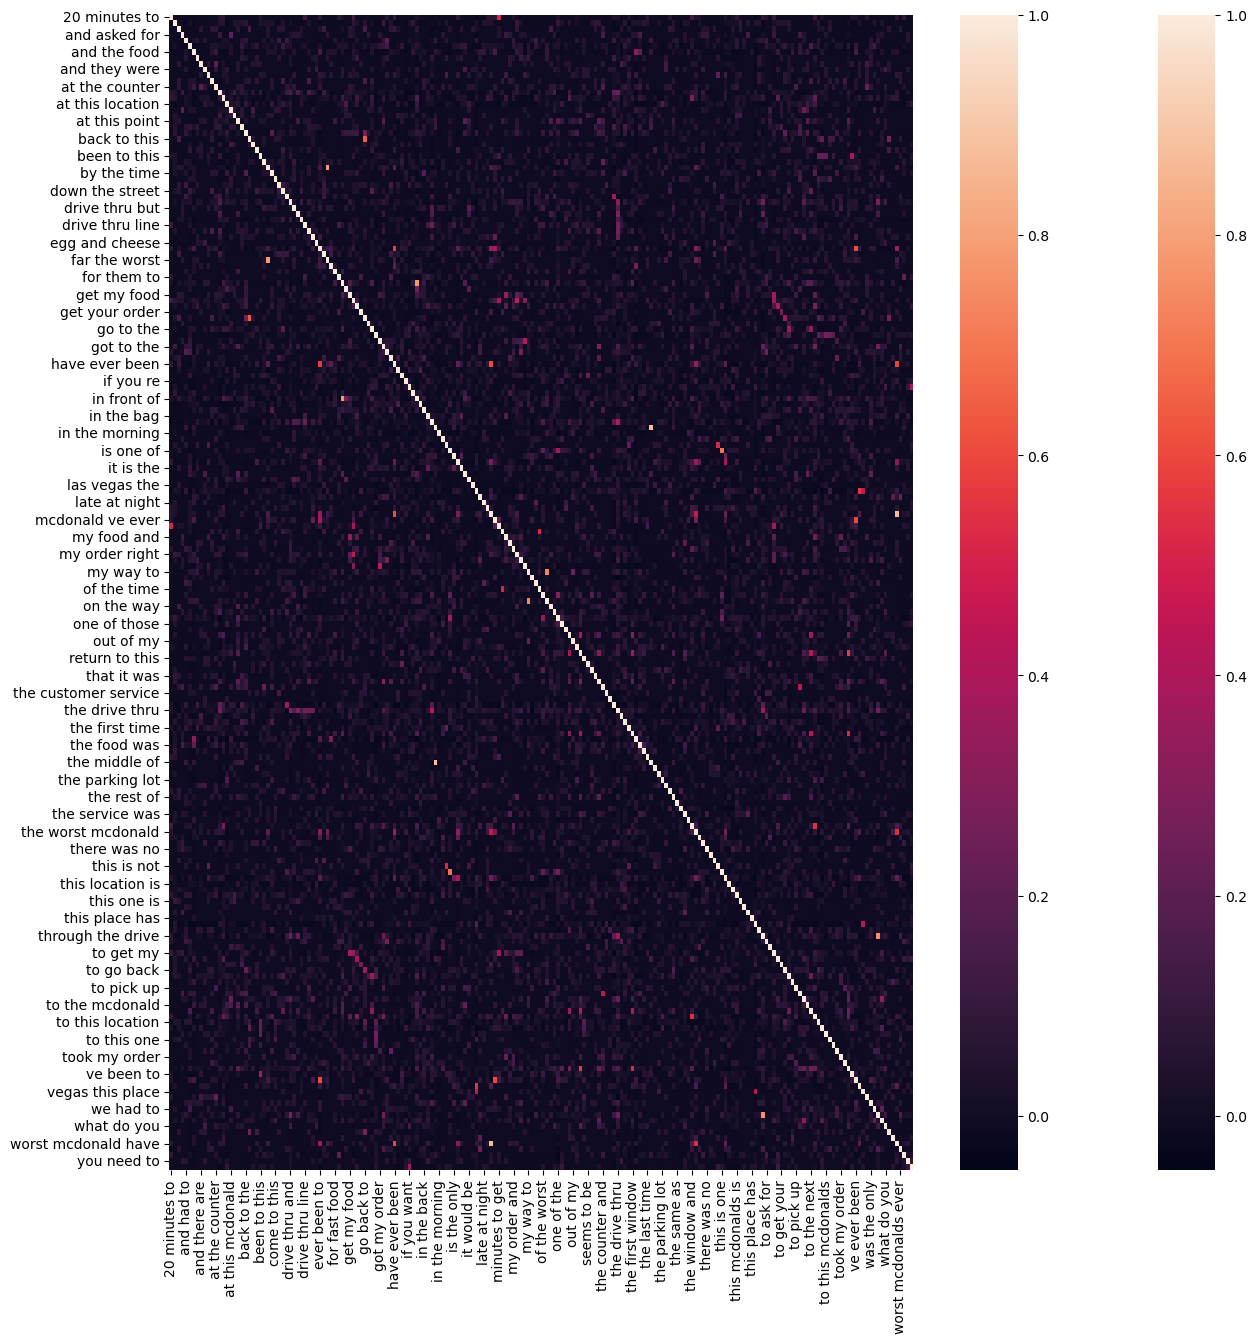

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
sns.heatmap(correlations)
plt.show()

##can see which n-grams correlate highly with each other

# Principle Component Analysis

If you have an original matrix $Z$, you can decompose this matrix into two smaller matrices $X$ and $Q$. 

## Important Points:

- Multiplying a vector by a matrix typically changes the direction of the vector. For instance:
<figure>
  <img src="https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/images/multvector.png" alt="my alt text"/>
    <figcaption><a href="https://lazyprogrammer.me/tutorial-principal-components-analysis-pca">Lazy Programmer- 
        Tutorial to PCA</a></figcaption>
</figure>

However, there are eigenvalues λ and eigenvectors $v$ such that

$$
\sum{X}v = \lambda v
$$

Multiplying the eigenvectors $v$ with the eigenvalue $\lambda$ does not change the direction of the eigenvector.

Multiplying the eigenvector $v$ by the covariance matrix $\sum{X}$ also does not change the direction of the eigenvector.

If our data $X$ is of shape $N \times D$, it turns out that we have $D$ eigenvalues and $D$ eigenvectors. This means we can arrange the eigenvalues $\lambda$ in decreasing order so that

$$
\lambda_3 > \lambda_2 > \lambda_5
$$

In this case, $\lambda_3$ is the largest eigenvalue, followed by $\lambda_2$, and then $\lambda_5$. Then, we can arrange 

We can also rearrange the eigenvectors the same: $v_3$ will be the first column, $v_2$ will be the second column, and $v_5$ will be the third column.

We'll end up with two matrices $V$ and $\Lambda$:
<figure>
  <img src="https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/images/pca1.png" alt="my alt text"/>
    <figcaption><a href="https://lazyprogrammer.me/tutorial-principal-components-analysis-pca">Lazy Programmer- 
        Tutorial to PCA</a></figcaption>
</figure>

In [7]:
# what is the shape of our features?
features.shape

(1526, 200)

In [8]:
from sklearn.decomposition import PCA

## 4 dimensions kept from 200
pca = PCA(n_components=4)

Z = pca.fit_transform(features)

# what is the shape of Z?
Z

##don't know what the values mean, you lose explainability doing PCA/dimensionality reduction
##these 4 columns are the eigenvectors corresponding to the top 4 eigenvalues

array([[-0.23176372, -0.09665425, -0.01099637, -0.10949991],
       [-0.19602785, -0.06131729, -0.11220467,  0.24133775],
       [-0.15130391,  0.73169921, -0.39148954, -0.24508942],
       ...,
       [-0.20438644,  0.0132246 , -0.07525758, -0.08763681],
       [-0.20189106, -0.05074105,  0.07694623,  0.03869031],
       [-0.23186369, -0.09233886, -0.02610598, -0.07606989]])

In [9]:
Z.shape

(1526, 4)

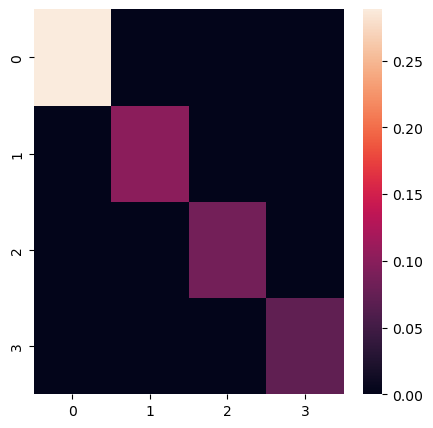

In [12]:
# what will happen if we take the correlation matrix and covariance matrix of our new reduced features?
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
covariances = pd.DataFrame(np.cov(Z.transpose()))
plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(covariances)
plt.show()

##now there is no multicollinearity

In [13]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [14]:
pca = PCA(n_components=2)
Z_two_dimensions = pca.fit_transform(features)
Z_two_dimensions

array([[-0.23176373, -0.09665982],
       [-0.19602809, -0.06109783],
       [-0.15130379,  0.73186884],
       ...,
       [-0.20438663,  0.01315167],
       [-0.20189067, -0.05044318],
       [-0.23186361, -0.09249125]])

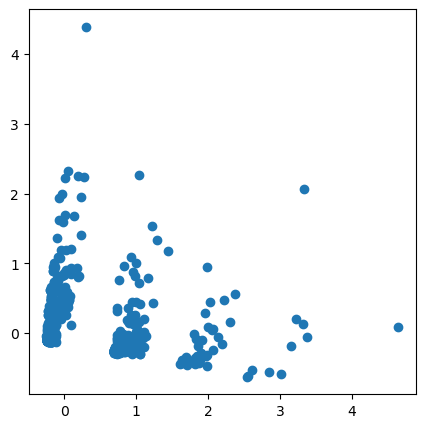

In [17]:
import matplotlib.pyplot as plt

plt.scatter(Z_two_dimensions[:,0], Z_two_dimensions[:, 1])
reduced_features_df = pd.DataFrame(Z_two_dimensions, columns=["x1", "x2"])
reduced_features_df["text"] = text
reduced_features_df.to_csv("reduced_features.csv")
plt.show()

##2 dimensions are kind of clumped, probably artifact of the original countvectorizer, 
##(since it gives discrete values 1,2,3,4, etc)

##if there was just a clump of points going straight up, shows x axis is providing little to no info,
##might even be worth reducing by one more dimension in that case

# Singular Value Decomposition

Given an input matrix $A$, we want to try to represent it instead as three smaller matrices $U$, $\sum$, and $V$. Instead of **$n$ original terms**, we want to represent each document as **$r$ concepts** (other referred to as **latent dimensions**, or **latent factors**)- from [Mining of Massive Datasets - Dimensionality Reduction: Singular Value Decomposition](https://www.youtube.com/watch?v=P5mlg91as1c):
<figure>
  <img src="https://raw.githubusercontent.com/ychennay/dso-560-nlp-text-analytics/main/images/svd.png" alt="my alt text"/>
    <figcaption><i>
        <a href="https://www.youtube.com/watch?v=P5mlg91as1c">Mining of Massive Datasets - Dimensionality Reduction: Singular Value Decomposition</a> by Leskovec, Rajaraman, and Ullman (Stanford University)</i></figcaption>
</figure>

Here, **$A$ is your matrix of word vectors** - you could use any of the word vectorization techniques we have learned so far, include one-hot encoding, word count, TF-IDF.

- $\sum$ will be a **diagonal matrix** with values that are positive and sorted in decreasing order. Its value indicate the **variance (information encoded on that new dimension)**- therefore, the higher the value, the stronger that dimension is in capturing data from A, the original features. For our purposes, we can think of the rank of this $\sum$ matrix as the number of desired dimensions. Instance, if we want to reduce $A$ from shape $1020 x 300$ to $1020 x 10$, we will want to reduce the rank of $\sum$ from 300 to 10.

- $U^T U = I$ and $V^T V = I$

## Measuring the Quality of the Reconstruction

A popular metric used for measuring the quality of the reconstruction is the [Frobenius Norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm). When you explain your methodology for reducing dimensions, usually managers / stakeholders will want to some way to compare multiple dimensionality techniques' ability to quantify its ability to retain information but trim dimensions:

$$
\begin{equation}
||A_{old}-A_{new}||_{F} = \sqrt{\sum_{ij}{(A^{old}_{ij}- A^{new}_{ij}}})^2
\end{equation}
$$

## Heuristic Step for How Many Dimensions to Keep

1. Sum the $\sum$ matrix's diagonal values: 
$$
\begin{equation}
\sum_{i}^{m}\sigma_{i}
\end{equation}
$$

2. Define your threshold of "information" (variance) $\alpha$ to keep: usually 80% to 90%. 

3. Define your cutoff point $C$: $$
\begin{equation}
C = \sum_{i}^{m}\sigma_{i} \alpha
\end{equation}
$$

4. Beginning with your largest singular value, sum your singular values $\sigma_{i}$ until it is greater than C. Retain only those dimensions.

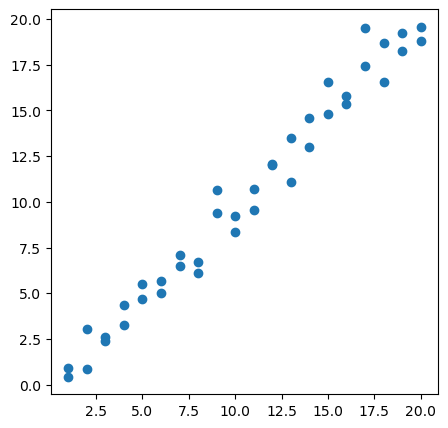

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
x = np.linspace(1,20, 20) # create the first dimension
x = np.concatenate((x,x))
y = x + np.random.normal(0,1, 40) # create the second dimension
z = x + np.random.normal(0,2, 40) # create the third dimension
a = x + np.random.normal(0,4, 40) # create the fourth dimension
plt.scatter(x,y) # plot just the first two dimensions
plt.show()

In [19]:
A = np.stack([x,y,z,a]).T
A

array([[ 1.        ,  0.90776829, -2.92701378, -1.31800865],
       [ 2.        ,  3.03197974,  4.91041348, -5.12841311],
       [ 3.        ,  2.37743436,  3.88439356,  1.22029153],
       [ 4.        ,  3.24671913,  2.29282603, -2.08970094],
       [ 5.        ,  5.50306919,  3.96205807,  7.59296511],
       [ 6.        ,  5.66887045,  8.93016093, 12.84432637],
       [ 7.        ,  6.47723491,  8.94925021,  4.55221449],
       [ 8.        ,  6.0980888 ,  8.53486234, 11.81946186],
       [ 9.        , 10.66543592, 11.50342974,  2.05872959],
       [10.        ,  9.22448355,  6.59595984,  9.53486101],
       [11.        , 10.68288443,  7.26764815,  4.94478569],
       [12.        , 12.02307498, 11.33102254, 12.9260669 ],
       [13.        , 11.06955732, 13.77312825, 16.73240851],
       [14.        , 14.58842892, 14.37396548, 19.02486068],
       [15.        , 14.77595481, 15.29766712, 15.60046747],
       [16.        , 15.37083194, 13.24782709, 16.52536001],
       [17.        , 17.

In [20]:
D = 1
##svd from scipy, decompose original matrix of 4 features
##gives you actual matrics, you decide how many you want
U, s, V = svd(A)
print(f"s is {s} ({s.shape})\n")
print(f"U is {U} ({U.shape})\n")
print(f"V is {V} ({V.shape})")

##s - strength of each topic

s is [150.66171388  20.82005824  11.1079011    4.14685167] ((4,))

U is [[ 0.00785384 -0.02656099  0.28988846 ... -0.10779252 -0.25530831
  -0.24871801]
 [-0.01570434 -0.36018654 -0.11532161 ...  0.05770331  0.01454667
   0.07539522]
 [-0.03475814 -0.0816151  -0.07476774 ... -0.47430134 -0.03248669
  -0.10811745]
 ...
 [-0.24911099 -0.06406693 -0.36007751 ...  0.77079408 -0.07428687
  -0.11159115]
 [-0.23123667 -0.1370413   0.11520778 ... -0.0315376   0.91384882
  -0.08481984]
 [-0.24898239 -0.09515241  0.04439342 ... -0.06763229 -0.08883064
   0.90358513]] ((40, 40))

V is [[-0.50070604 -0.49326254 -0.50085935 -0.50509944]
 [-0.2132251  -0.29496843 -0.36185802  0.85824673]
 [ 0.40494773  0.46125719 -0.78614773 -0.07232481]
 [-0.73474203  0.67596412  0.01305461  0.05528311]] ((4, 4))


In [24]:
s[D:] = 0
S = np.zeros((A.shape[0], A.shape[1]))
S[:A.shape[1], :A.shape[1]] = np.diag(s)
A_reconstructed = U.dot(S.dot(V))
np.sum((A_reconstructed - A) ** 2) ** (1/2) # Frobenius norm
# reconstruct matrix
U.dot(S)

array([[  1.18327352,   0.        ,   0.        ,   0.        ],
       [ -2.36604204,   0.        ,   0.        ,   0.        ],
       [ -5.23672082,   0.        ,   0.        ,   0.        ],
       [ -3.69718566,   0.        ,   0.        ,   0.        ],
       [-11.03762431,   0.        ,   0.        ,   0.        ],
       [-16.76089429,   0.        ,   0.        ,   0.        ],
       [-13.48155623,   0.        ,   0.        ,   0.        ],
       [-17.25837621,   0.        ,   0.        ,   0.        ],
       [-16.56867786,   0.        ,   0.        ,   0.        ],
       [-17.67685365,   0.        ,   0.        ,   0.        ],
       [-16.91491113,   0.        ,   0.        ,   0.        ],
       [-24.14320266,   0.        ,   0.        ,   0.        ],
       [-27.31930664,   0.        ,   0.        ,   0.        ],
       [-31.01459147,   0.        ,   0.        ,   0.        ],
       [-30.34078252,   0.        ,   0.        ,   0.        ],
       [-30.57540032,   0

## Toy Example of SVD

In [ ]:
# define a matrix
B = np.array([[1, 2], [3, 4], [5, 6]])
print("B:\n", B)
# Singular-value decomposition
U, s, VT = svd(B)
# create m x n Sigma matrix
Sigma = np.zeros((B.shape[0],B.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:B.shape[1], :B.shape[1]] = np.diag(s)
Sigma

## Scikit Learn Example

In [22]:
features.shape

(1526, 200)

In [23]:
from sklearn.decomposition import TruncatedSVD

##this version allowes you to tell it how many components you want to keep
svd = TruncatedSVD(n_components=2)
reduced_svd_features = svd.fit_transform(features)
reduced_svd_features

array([[0.        , 0.        ],
       [0.09144194, 0.15499952],
       [0.17171481, 0.7390409 ],
       ...,
       [0.06606678, 0.14748702],
       [0.10874563, 0.2019033 ],
       [0.02811324, 0.05092409]])

In [ ]:
svd.singular_values_

In [ ]:
svd.explained_variance_.sum()

Classwork 4/12
2. False, even though the emission matrix represents the likelihood of seeing a word given the part-of-speech, the columns, not rows, should sum to 1.
3. False, word2vec gives a word a static embedding, so "sack" will have the same embedding value regardless of its context (which is one of the limitations/downsides of word2vec).